In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [8]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [9]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [12]:
df.isnull().sum(axis=0)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
df.shape

(100000, 9)

In [14]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [15]:
print (df['heart_disease'].value_counts())
print (df["gender"].value_counts())

df['age'] = df['age'].astype("int64")

df.sort_values(by=["age","blood_glucose_level"],ascending=True).head()

heart_disease
0    96058
1     3942
Name: count, dtype: int64
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3742,Male,0,0,0,No Info,12.80,6.6,80,0
5920,Female,0,0,0,No Info,18.39,3.5,80,0
9683,Female,0,0,0,No Info,11.88,5.7,80,0
9733,Male,0,0,0,No Info,25.71,4.8,80,0
11590,Female,0,0,0,No Info,17.15,4.0,80,0


In [16]:
df.iloc[0:3,0:12]

df[-1:]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99999,Female,57,0,0,current,22.43,6.6,90,0


In [17]:
d = {"Male" : 1, "Female" : 2, "Other" : 3}

df = db.replace({"gender":d})

df.head()

/tmp/ipykernel_772/2221394530.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = db.replace({"gender":d})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,never,25.19,6.6,140,0
1,2,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,2,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [18]:
f = {"No Info" : 1, "never" : 2, "former" : 3, "current" : 4, "not current" : 5, "ever" : 6}


df = df.replace(f)
df.head

/tmp/ipykernel_772/2961464154.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(f)


<bound method NDFrame.head of        gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           2  80.0             0              1                2  25.19   
1           2  54.0             0              0                1  27.32   
2           1  28.0             0              0                2  27.32   
3           2  36.0             0              0                4  23.45   
4           1  76.0             1              1                4  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       2  80.0             0              0                1  27.32   
99996       2   2.0             0              0                1  17.37   
99997       1  66.0             0              0                3  27.83   
99998       2  24.0             0              0                2  35.42   
99999       2  57.0             0              0                4  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0    

In [19]:
df['diabetes'].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

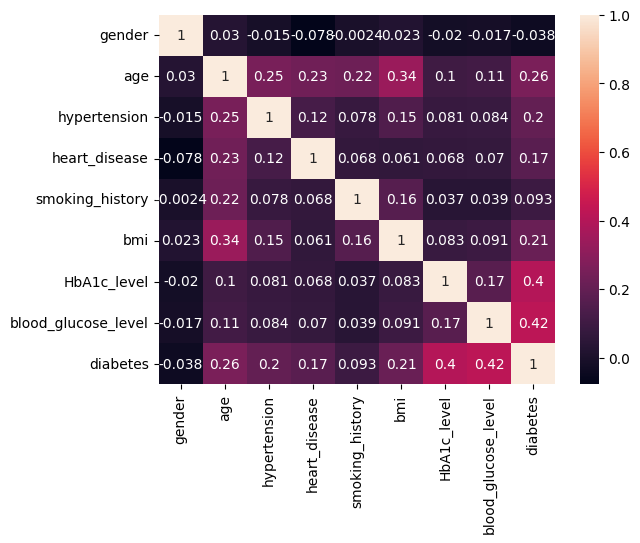

In [20]:
ax = sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

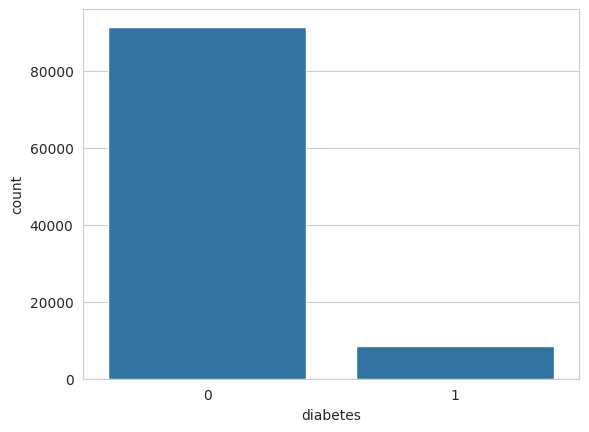

In [21]:
sns.set_style('whitegrid')
sns.countplot(x = 'diabetes', data=df)

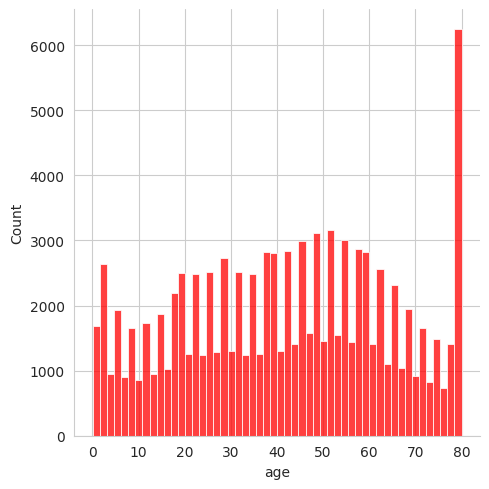

In [22]:
sns.displot(df['age'], kde=False,color="red")

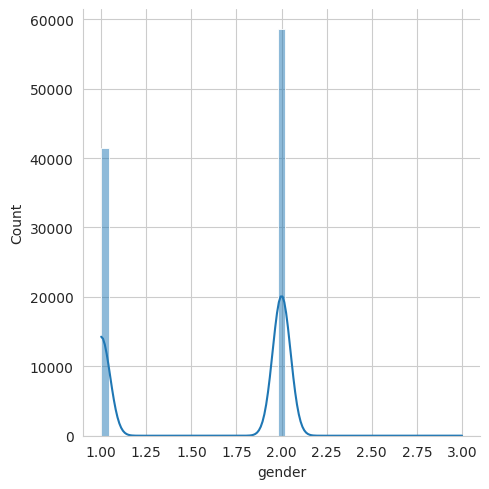

In [23]:
sns.displot(df['gender'], kde=True)


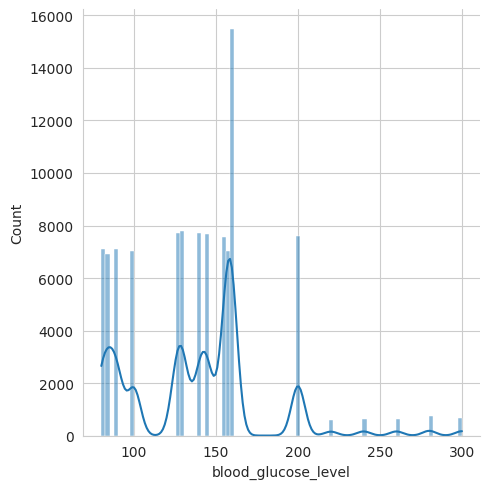

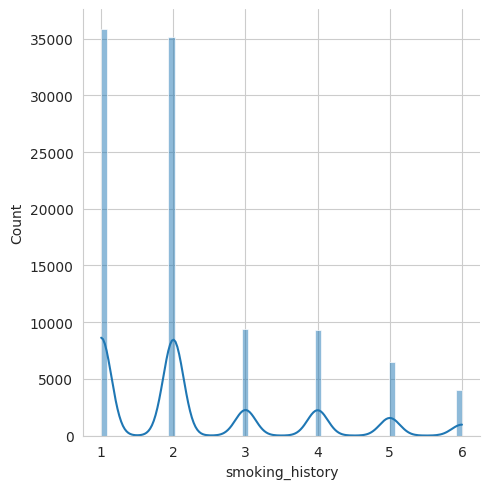

In [24]:
sns.displot(df['blood_glucose_level'], kde=True)
sns.displot(df['smoking_history'], kde=True)

Text(0.5, 1.0, 'Outliner Identification')

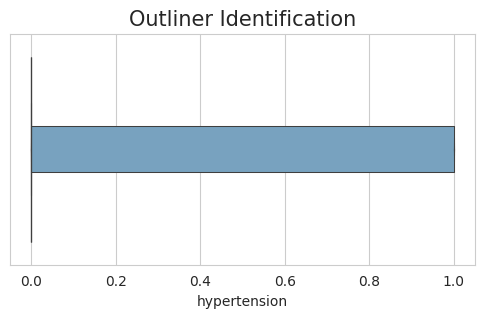

In [25]:
plt.figure(figsize=(6,3))
sns.boxenplot(x=df['hypertension'])
plt.title("Outliner Identification", fontsize = 15)

In [26]:
#training the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]
Y = df [['diabetes']]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=101)

model = LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

/home/user/workpace/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


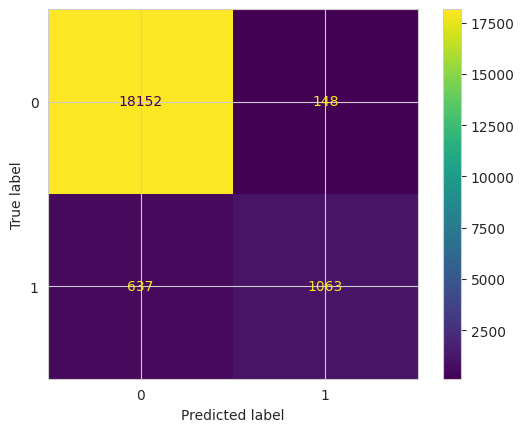

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.88      0.63      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



/home/user/workpace/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18300
           1       0.46      0.66      0.54      1700

    accuracy                           0.91     20000
   macro avg       0.71      0.79      0.75     20000
weighted avg       0.92      0.91      0.91     20000



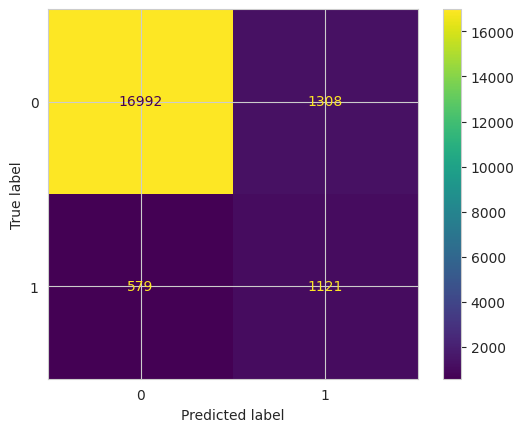

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

cm1=confusion_matrix(y_test,y_pred1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()


print(classification_report(y_test,y_pred1))

In [31]:
print ("LogisticRegression : ", classification_report(y_test,y_pred))
print ("Naive Bayes : ", classification_report(y_test,y_pred1))

LogisticRegression :                precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.88      0.63      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Naive Bayes :                precision    recall  f1-score   support

           0       0.97      0.93      0.95     18300
           1       0.46      0.66      0.54      1700

    accuracy                           0.91     20000
   macro avg       0.71      0.79      0.75     20000
weighted avg       0.92      0.91      0.91     20000



In [32]:
from sklearn.metrics import accuracy_score

print("Logistric Regression model accuracy is",accuracy_score(y_test,y_pred)*100,"%")

print("Naive Bayes Model accuracy is",accuracy_score(y_test,y_pred1)*100,"%")

Logistric Regression model accuracy is 96.075 %
Naive Bayes Model accuracy is 90.565 %
